**1. Download Dataset**

In [1]:
!gdown 1dANzxlEjeCEbveFOWWqzSG-niVx-vCgK

Downloading...
From: https://drive.google.com/uc?id=1dANzxlEjeCEbveFOWWqzSG-niVx-vCgK
To: d:\AIO2024\module_5\week_1\sentiment_analysis.csv

  0%|          | 0.00/1.10M [00:00<?, ?B/s]
 48%|████▊     | 524k/1.10M [00:00<00:00, 2.50MB/s]
100%|██████████| 1.10M/1.10M [00:00<00:00, 3.94MB/s]


**2. Import libraries**

In [2]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from nltk.tokenize import TweetTokenizer
from collections import defaultdict

**3. Read data**

In [3]:
dataset_path = 'sentiment_analysis.csv'
df = pd.read_csv(dataset_path, index_col='id')
df.head()

,label,tweet
id,,
1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
2,0,Finally a transparant silicon case ^^ Thanks t...
3,0,We love this! Would you go? #talk #makememorie...
4,0,I'm wired I know I'm George I was made that wa...
5,1,What amazing service! Apple won't even talk to...


**4. Preprocessing**

In [ ]:
def text_normalize(text):
    # Retweet old acronym "RT" removal
    text = re.sub(r'^RT[\s]+', '', text)

    # Hyperlink removal
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)

    # Hashtag removal
    text = re.sub(r'#', '', text)

    # Punstuation removal
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenization
    tokenizer = TweetTokenizer(preserve_case=False,
                               strip_handles=True,
                               reduce_len=True)
    text_tokens = tokenizer.tokenize(text)

    return text_tokens

In [5]:
def get_freqs(df):
    freqs = defaultdict(lambda: 0)
    for idx, row in df.iterrows():
        tweet = row['tweet']
        label = row['label']

        tokens = text_normalize(tweet)
        for token in tokens:
            freqs[(token, label)] += 1

    return freqs

In [6]:
def get_feature(text, freqs):
    tokens = text_normalize(text)

    X = np.zeros(3)
    X[0] = 1

    for token in tokens:
        X[1] += freqs[(token, 1)]
        X[2] += freqs[(token, 0)]

    return X

In [7]:
X = []
y = []

freqs = get_freqs(df)
for idx, row in df.iterrows():
    tweet = row['tweet']
    label = row['label']

    X.append(get_feature(tweet, freqs))
    y.append(label)

X = np.array(X)
y = np.array(y)

**5. Train, val, test split**

In [8]:
val_size = 0.2
test_size = 0.125
randome_state = 2
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=val_size, random_state=randome_state, shuffle=is_shuffle)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=test_size, random_state=randome_state, shuffle=is_shuffle)

**6. Normalization**

In [9]:
normalizer = StandardScaler()
X_train[:, 1:] = normalizer.fit_transform(X_train[:, 1:])
X_val[:, 1:] = normalizer.transform(X_val[:, 1:])
X_test[:, 1:] = normalizer.transform(X_test[:, 1:])

**7. Important functions**

In [10]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict(X, theta):
    dot_product = np.dot(X, theta)
    y_hat = sigmoid(dot_product)
    return y_hat

def compute_loss(y_hat, y):
    y_hat = np.clip(y_hat, 1e-10, 1 - 1e-10)
    loss = (-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)).mean()
    return loss

def compute_gradient(X, y, y_hat):
    gradient = np.dot(X.T, (y_hat - y)) / y.size
    return gradient

def update_theta(theta, gradient, lr):
    return theta - lr * gradient

def compute_accuracy(X, y, theta):
    y_hat = predict(X, theta).round()
    acc = (y_hat == y).mean()
    return acc

**8. Declare hyperparameters and initialize weights**

In [11]:
lr = 0.01
epochs = 200
batch_size = 128

np.random.seed(randome_state)
theta = np.random.uniform(X_train.shape[1])

**9. Training model**

In [12]:
train_accs = []
val_accs = []
train_losses = []
val_losses = []

for epoch in range(epochs):
    train_batch_losses = []
    val_batch_losses = []
    train_batch_accs = []
    val_batch_accs = []

    for i in range(0, X_train.shape[0], batch_size):
        X_batch = X_train[i:i + batch_size]
        y_batch = y_train[i:i + batch_size].reshape(-1, 1)

        y_hat = predict(X_batch, theta)
        loss = compute_loss(y_hat, y_batch)
        gradient = compute_gradient(X_batch, y_batch, y_hat)
        theta = update_theta(theta, gradient, lr)

        train_batch_losses.append(loss)
        train_batch_accs.append(compute_accuracy(X_batch, y_batch, theta))

        y_val_hat = predict(X_val, theta)
        val_loss = compute_loss(y_val_hat, y_val.reshape(-1, 1))
        val_batch_losses.append(val_loss)
        val_batch_accs.append(compute_accuracy(X_val, y_val.reshape(-1, 1), theta))

    train_losses.append(np.mean(train_batch_losses))
    val_losses.append(np.mean(val_batch_losses))
    train_accs.append(np.mean(train_batch_accs))
    val_accs.append(np.mean(val_batch_accs))

    print(f'\nEpoch {epoch + 1}/{epochs} \tTraining loss: {train_losses[-1]:.4f} \tValidation loss: {val_losses[-1]:.4f}')


Epoch 1/200 	Training loss: 1.6343 	Validation loss: 1.6318

Epoch 2/200 	Training loss: 1.5628 	Validation loss: 1.5458

Epoch 3/200 	Training loss: 1.4803 	Validation loss: 1.4631

Epoch 4/200 	Training loss: 1.4009 	Validation loss: 1.3838

Epoch 5/200 	Training loss: 1.3246 	Validation loss: 1.3077

Epoch 6/200 	Training loss: 1.2515 	Validation loss: 1.2349

Epoch 7/200 	Training loss: 1.1816 	Validation loss: 1.1654

Epoch 8/200 	Training loss: 1.1150 	Validation loss: 1.0993

Epoch 9/200 	Training loss: 1.0516 	Validation loss: 1.0364

Epoch 10/200 	Training loss: 0.9916 	Validation loss: 0.9769

Epoch 11/200 	Training loss: 0.9349 	Validation loss: 0.9209

Epoch 12/200 	Training loss: 0.8817 	Validation loss: 0.8683

Epoch 13/200 	Training loss: 0.8319 	Validation loss: 0.8192

Epoch 14/200 	Training loss: 0.7857 	Validation loss: 0.7737

Epoch 15/200 	Training loss: 0.7430 	Validation loss: 0.7316

Epoch 16/200 	Training loss: 0.7039 	Validation loss: 0.6931

Epoch 17/200 	Tr

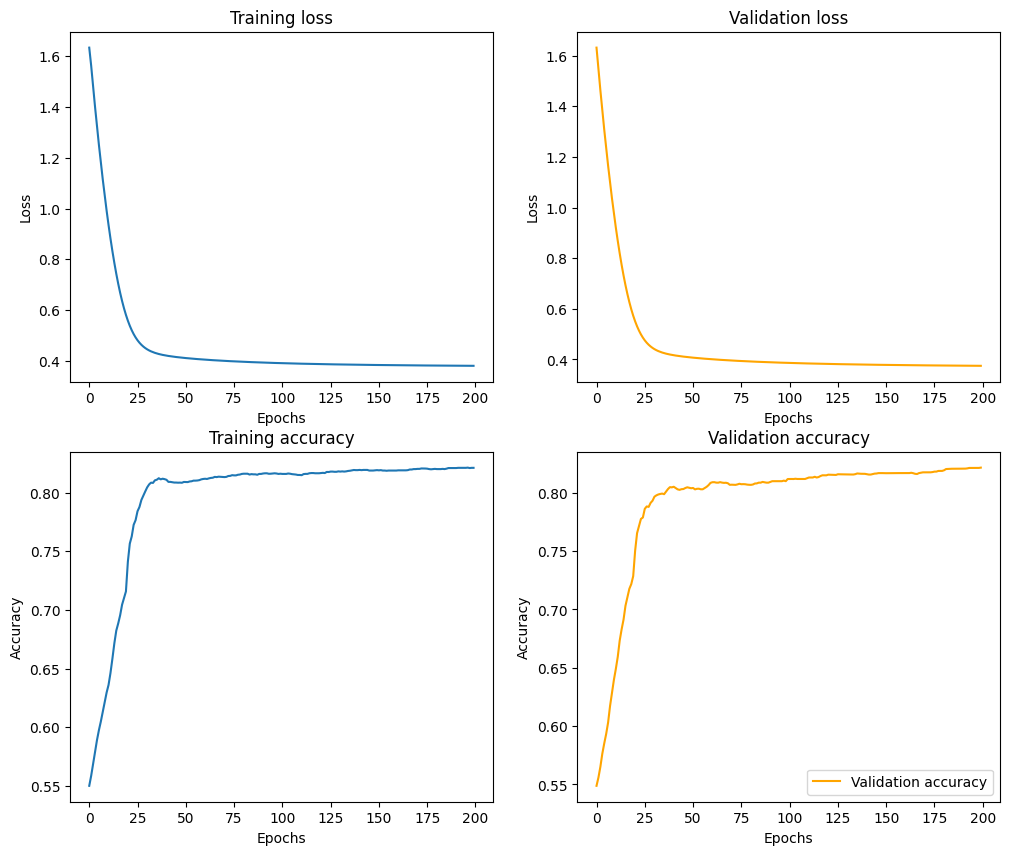

In [13]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax[0, 0].plot(train_losses, label='Training loss')
ax[0, 0].set(xlabel='Epochs', ylabel='Loss')
ax[0, 0].set_title('Training loss')

ax[0, 1].plot(val_losses, label='Validation loss', color='orange')
ax[0, 1].set(xlabel='Epochs', ylabel='Loss')
ax[0, 1].set_title('Validation loss')

ax[1, 0].plot(train_accs, label='Training accuracy')
ax[1, 0].set(xlabel='Epochs', ylabel='Accuracy')
ax[1, 0].set_title('Training accuracy')

ax[1, 1].plot(val_accs, label='Validation accuracy', color='orange')
ax[1, 1].set(xlabel='Epochs', ylabel='Accuracy')
ax[1, 1].set_title('Validation accuracy')

plt.legend()
plt.show()

**10. Evaluation model**

In [14]:
val_set_acc = compute_accuracy(X_val, y_val.reshape(-1, 1), theta)
test_set_acc = compute_accuracy(X_test, y_test.reshape(-1, 1), theta)
print(f'Evaluation on validation and test set')
print(f'Validation set accuracy: {val_set_acc:.4f}')
print(f'Test set accuracy: {test_set_acc:.4f}')

Evaluation on validation and test set
Validation set accuracy: 0.8220
Test set accuracy: 0.8422
